In [490]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
import imageio
from PIL import Image

def read_img(img_name, img_dir = 'images_in/filters/', grayscale=False):
    img = Image.open(img_dir + '/' + img_name)
    if grayscale:
        img = img.convert('L')
    img = np.array(img)
    img = img / 255
    return img

def save_img(fname, img_out, out_dir = 'out_path', grayscale=False):
    if '.jpg' not in fname:
        fname = fname + '.jpg'
    full_name = out_dir + '/' + fname
    # img_out = (img_out*255).astype(np.uint8)
    if grayscale:
        imageio.imwrite(full_name, img_out)
    else:
        plt.imsave(full_name, img_out)

# Part 1
### Part 1.1: Finite Difference Operator

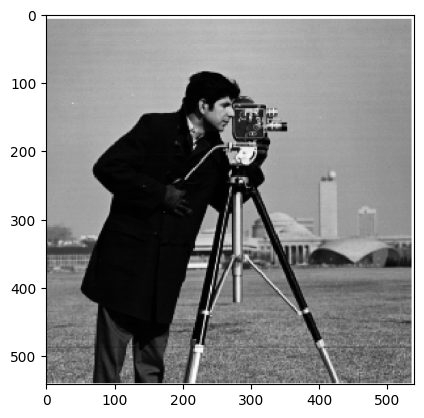

In [491]:
in_dir = 'images_in/filters/'
dx = np.array([[1, -1]])
dy = np.array([[1], [-1]])
def convolve(filter, img):
    return scipy.signal.convolve(img, filter, mode='same')

cameraman_img = read_img('cameraman.png', in_dir, grayscale=True)
plt.imshow(cameraman_img, cmap='gray')

Lossy conversion from float64 to uint8. Range [-0.8235294117647058, 1.0]. Convert image to uint8 prior to saving to suppress this warning.


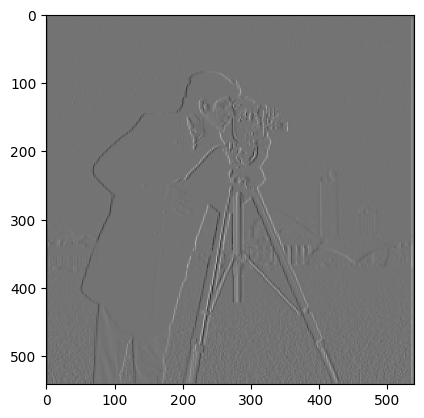

In [492]:
part1_out_dir = 'part1_out_dir'
dx_img = convolve(dx, cameraman_img)
plt.imshow(dx_img, cmap='gray')
save_img('dx_img', dx_img, out_dir=part1_out_dir, grayscale=True)

Lossy conversion from float64 to uint8. Range [-0.6823529411764706, 1.0]. Convert image to uint8 prior to saving to suppress this warning.


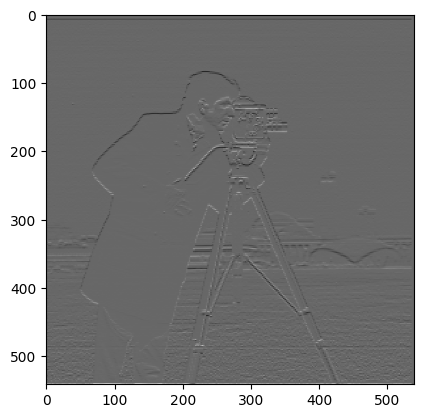

In [301]:
dy_img = convolve(dy, cameraman_img)
plt.imshow(dy_img, cmap='gray')
save_img('dy_img', dy_img, out_dir=part1_out_dir, grayscale=True)

Lossy conversion from float64 to uint8. Range [0.0, 1.4142135623730951]. Convert image to uint8 prior to saving to suppress this warning.


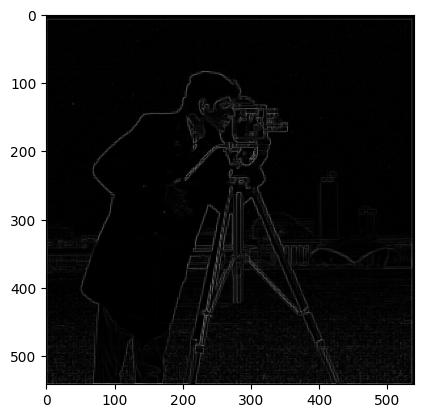

In [302]:
edge_img = np.sqrt(dx_img**2 + dy_img**2)
plt.imshow(edge_img, cmap='gray')
save_img('edge_img', edge_img, out_dir=part1_out_dir, grayscale=True)

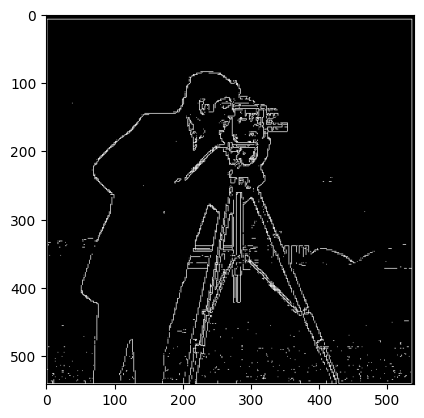

In [303]:
edge_img_thresholded = (edge_img > 0.21).astype(np.uint8) * 255
plt.imshow(edge_img_thresholded, cmap='gray')
save_img('edge_thresholded', edge_img_thresholded, out_dir=part1_out_dir, grayscale=True)

### Part 1.2: Derivative of Gaussian Filter

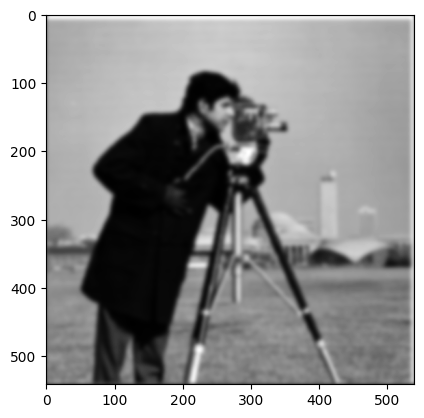

In [304]:
part1_2_out_dir = 'part1_out_dir/part1_2/'

def create_gaussian_2d(sigma=3, ksize=19):
    gaussian_1d = cv2.getGaussianKernel(ksize, sigma)
    gaussian_2d = np.outer(gaussian_1d, gaussian_1d)
    return gaussian_2d

gaussian_2d = create_gaussian_2d()
blurred_cameraman = convolve(gaussian_2d, cameraman_img)
plt.imshow(blurred_cameraman, cmap='gray')

Lossy conversion from float64 to uint8. Range [-0.11516992328257836, 0.49738150178154944]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [-0.10628925919742338, 0.5627805252325707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


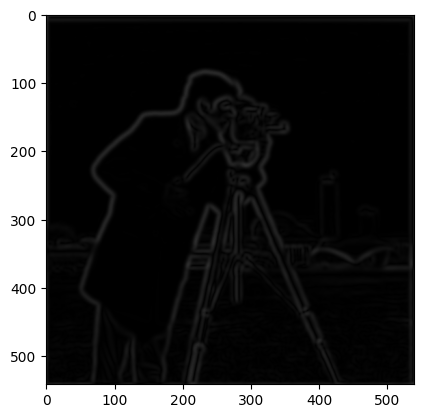

In [305]:
blurred_dx = convolve(dx, blurred_cameraman)
save_img('blurred_dx', blurred_dx, out_dir=part1_2_out_dir, grayscale=True)
blurred_dy = convolve(dy, blurred_cameraman)
save_img('blurred_dy', blurred_dy, out_dir=part1_2_out_dir, grayscale=True)
blurred_edge_img = np.sqrt(blurred_dx**2 + blurred_dy**2)
save_img('blurred_edge', blurred_edge_img, out_dir=part1_2_out_dir, grayscale=True)

plt.imshow(blurred_edge_img, cmap='gray')

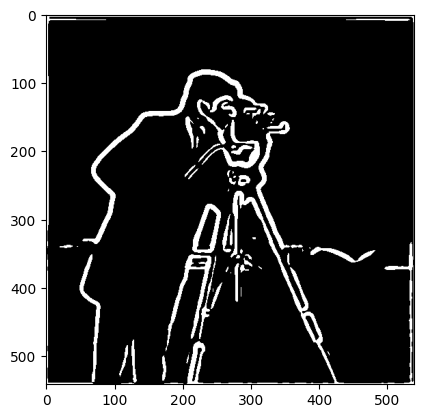

In [306]:
blurred_edge_img_thresholded = ((blurred_edge_img > 0.04) * 255).astype(np.uint8)
save_img('blurred_edge_thresholded', blurred_edge_img_thresholded, out_dir=part1_2_out_dir, grayscale=True)

plt.imshow(blurred_edge_img_thresholded, cmap='gray')

The resulting gradient magnitude image produced by starting with a blurred image has significantly less noise, making it easier to threshold. This is because by applying a Gaussian filter first, we reduce the high frequencies (low pass filter). The threshold can now be lowered to 0.04 from 0.21. Additionally, the edges produced are more prominent and thicker.

Lossy conversion from float64 to uint8. Range [-0.0034659100851356416, 0.0034659100851356416]. Convert image to uint8 prior to saving to suppress this warning.


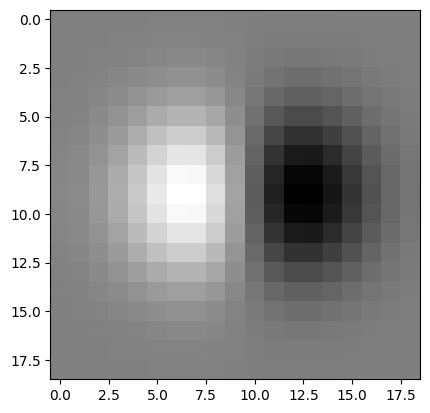

In [307]:
dx_gaussian = convolve(dx, gaussian_2d)
dy_gaussian = convolve(dy, gaussian_2d)

plt.imshow(dx_gaussian, cmap='gray')
save_img('dx_gaussian', dx_gaussian, out_dir=part1_2_out_dir, grayscale=True)

Lossy conversion from float64 to uint8. Range [-0.0034659100851356416, 0.0034659100851356416]. Convert image to uint8 prior to saving to suppress this warning.


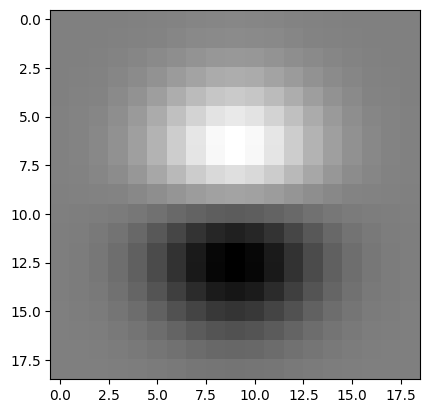

In [308]:
plt.imshow(dy_gaussian, cmap='gray')
save_img('dy_gaussian', dy_gaussian, out_dir=part1_2_out_dir, grayscale=True)

Lossy conversion from float64 to uint8. Range [-0.11392178092133867, 0.11479793545023029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.10501480388292385, 0.13079871124833628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


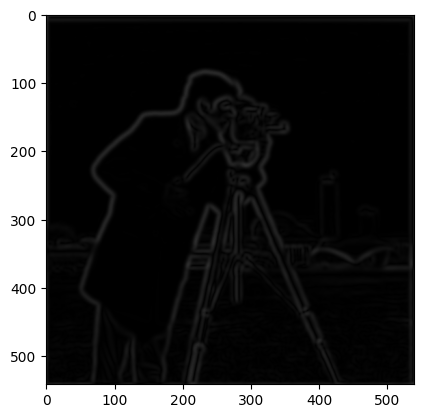

In [309]:
combined_blurred_dx = convolve(dx_gaussian, cameraman_img)
save_img('combined_blurred_dx', combined_blurred_dx, out_dir=part1_2_out_dir, grayscale=True)
combined_blurred_dy = convolve(dy_gaussian, cameraman_img)
save_img('combined_blurred_dy', combined_blurred_dy, out_dir=part1_2_out_dir, grayscale=True)
combined_blurred_edge = np.sqrt(blurred_dx**2 + blurred_dy**2)
save_img('combined_blurred_edge', combined_blurred_edge, out_dir=part1_2_out_dir, grayscale=True)

plt.imshow(combined_blurred_edge, cmap='gray')

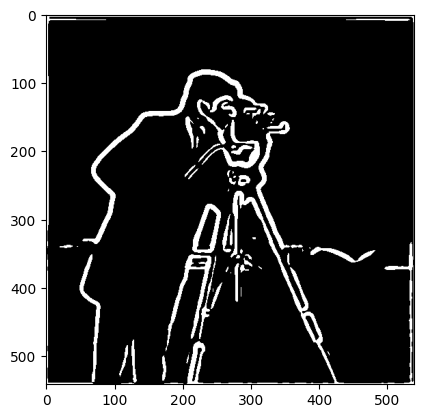

In [310]:
combined_blurred_edge_thresholded = ((combined_blurred_edge > 0.04) * 255).astype(np.uint8)
save_img('combined_blurred_edge_thresholded', combined_blurred_edge_thresholded, out_dir=part1_2_out_dir, grayscale=True)

plt.imshow(combined_blurred_edge_thresholded, cmap='gray')

We can get the same effect with a single convolution instead of two by creating derivative of gaussian filters from convolving the gaussian with D_x and D_y. We can see this results in the same final gradient magnitudes as before.

# Part 2: Fun With Frequencies
### Part 2.1: Image Sharpening

In [449]:
def create_unit_impulse(filter_shape):
    unit_impulse = np.zeros((filter_shape))
    unit_impulse[unit_impulse.shape[0]//2, unit_impulse.shape[1]//2,] = 1
    return unit_impulse

def create_sharpening_filter(alpha, sigma=3, ksize=18):
    gaussian = create_gaussian_2d(sigma, ksize)
    unit_impulse = create_unit_impulse(gaussian.shape)
    return (1+alpha) * unit_impulse - alpha * gaussian

def convolve_color(filter, img):
    res = np.zeros_like(img)
    res[:,:,0] = scipy.signal.convolve(img[:,:,0], filter, mode='same')
    res[:,:,1] = scipy.signal.convolve(img[:,:,1], filter, mode='same')
    res[:,:,2] = scipy.signal.convolve(img[:,:,2], filter, mode='same')
    res = np.clip(res, a_min=0, a_max=1)
    return res
part2_out_dir = 'part2_out_dir'
part2_1_out_dir = part2_out_dir + '/' + 'part2_1'

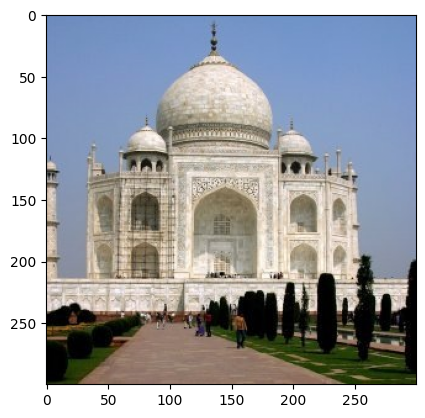

In [361]:
taj_img = read_img('taj.jpg')
plt.imshow(taj_img, cmap='gray')

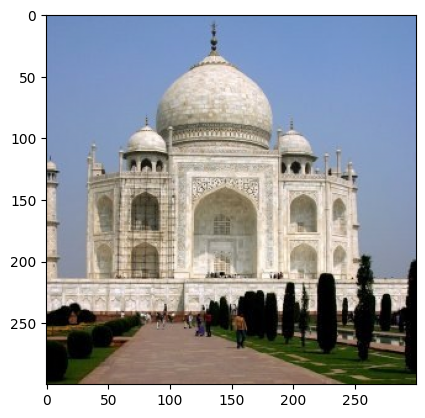

In [381]:
alpha = 0
taj_sharpened = convolve_color(create_sharpening_filter(alpha), taj_img)
save_img('taj_'+str(alpha), taj_sharpened, out_dir=part2_1_out_dir)
plt.imshow(taj_sharpened)

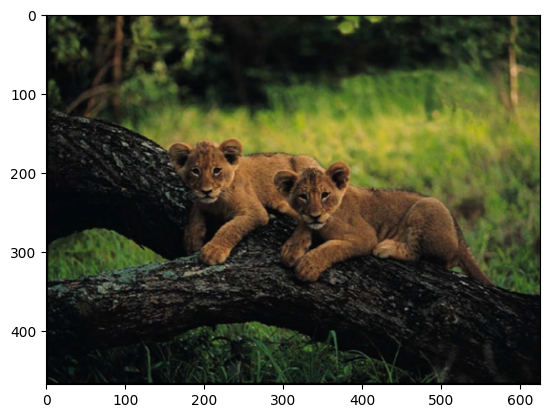

In [380]:
img = read_img('animal.jpg')
alpha = 0
img_sharpened = convolve_color(create_sharpening_filter(alpha), img)
save_img('animal_'+str(alpha), img_sharpened, out_dir=part2_1_out_dir)
plt.imshow(img_sharpened)

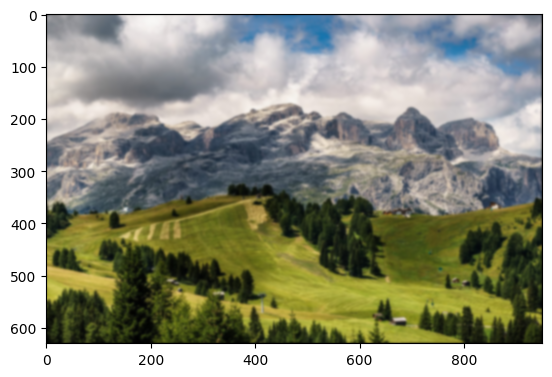

In [486]:
name = 'mountain'
sigma, ksize = 2,13
img = read_img(name+'.jpg')
blurred = convolve_color(create_gaussian_2d(sigma, ksize), img)
plt.imshow(blurred)
save_img(name+'_blurred', blurred, out_dir=part2_1_out_dir)

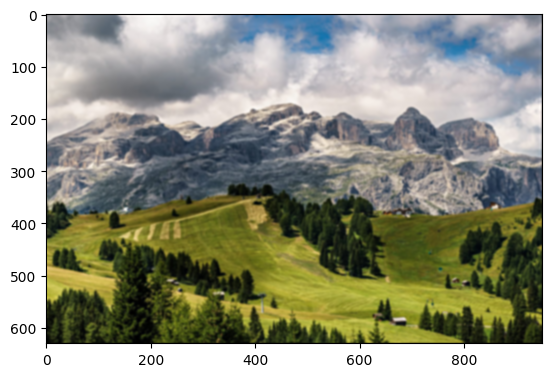

In [489]:
alpha = 1
sharpened = convolve_color(create_sharpening_filter(alpha,sigma,ksize), blurred)
plt.imshow(sharpened)
save_img(name+'_'+str(alpha), sharpened, out_dir=part2_1_out_dir)

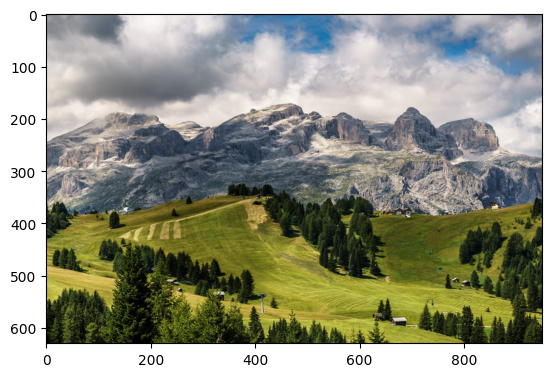

In [481]:
plt.imshow(img)

Evaluation: Resharpening the image after blurring it does not restore all of the original details, but it does considerably improve it over the blurred image. This is because the highest frequencies (fine details) are lost after blurring, and so resharpening can only add to the next highest frequencies.